
# Qiskit: Open-Source Quantum Development, an introduction

---








### Jan 2022, Iskandar Sitdikov




### Workshop contents

1.   Intro IBM Quantum Lab and Qiskit modules
2.   Circuits, backends, visualization
3.   Quantum info, circuit lib, algorithms
4.   Circuit compilation, pulse, opflow



## 1. Intro IBM Quantum Lab and Qiskit modules

### https://quantum-computing.ibm.com/lab

### https://qiskit.org/documentation/

### https://github.com/qiskit

![architecutre](./qiskit-architecture.png)

## 2. Circuits, backends and visualization

In [ ]:
from qiskit import IBMQ
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [23]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

### Your first quantum circuit

Let's begin exploring the different tools in Qiskit Terra. For that, we will now create a Quantum Circuit.



In [3]:
from qiskit import QuantumCircuit

# Create circuit
# <INSERT CODE>
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

In [4]:
# print circuit
# <INSERT CODE>

circuit.draw(initial_state=True)

┌───┐      ░ ┌─┐   
  q_0: |0>┤ H ├──■───░─┤M├───
          └───┘┌─┴─┐ ░ └╥┘┌─┐
  q_1: |0>─────┤ X ├─░──╫─┤M├
               └───┘ ░  ║ └╥┘
meas: 0 2/══════════════╩══╩═
                        0  1

Now let's run the circuit in the Aer simulator and plot the results in a histogram.


In [13]:
from qiskit import Aer

# run circuit on Aer simulator
# <INSERT CODE>

sim = Aer.get_backend('aer_simulator')  # this is the simulator we'll use
result = sim.run(circuit).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
counts

{'11': 495, '00': 529}

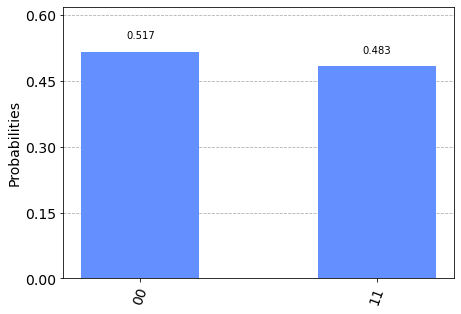

In [15]:
from qiskit.visualization import plot_histogram

# and display it on a histogram
# <INSERT CODE>
plot_histogram(counts)

### Qiskit Visualization tools

We have already seen how to plot the results in a histogram. There are other visualization tools that are useful when working with quantum computers, let's explore them.

#### Plot a state

In many situations you want to see the state of a quantum computer. This could be for debugging. Here we assume you have this state (either from simulation or state tomography) and the goal is to visualize the quantum state. This requires exponential resources, so we advise to only view the state of small quantum systems. There are several functions for generating different types of visualization of a quantum state



```
plot_state_city(quantum_state)
plot_state_qsphere(quantum_state)
plot_state_paulivec(quantum_state)
plot_state_hinton(quantum_state)
plot_bloch_multivector(quantum_state)
```



A quantum state is either a state matrix $ \rho $ (Hermitian matrix) or statevector $ | \psi ⟩ $ (complex vector). The state matrix is related to the statevector by 
$$ \rho = | \psi ⟩⟨ \psi | $$

The visualizations generated by the functions are:

`'plot_state_city'`: The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city.

`'plot_state_qsphere'`: The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. 
The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different 'qsphere' for each component.

`'plot_state_paulivec'`: The representation of the state matrix using Pauli operators as the basis. 

`'plot_state_hinton'`: Same as 'city' but where the size of the element represents the value of the matrix element.

`'plot_bloch_multivector'`: The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.

In [16]:
from qiskit.visualization import plot_state_city, plot_state_paulivec, plot_state_hinton

In [17]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)

In [9]:
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = backend.run(circuit).result()
psi  = result.get_statevector(circuit)

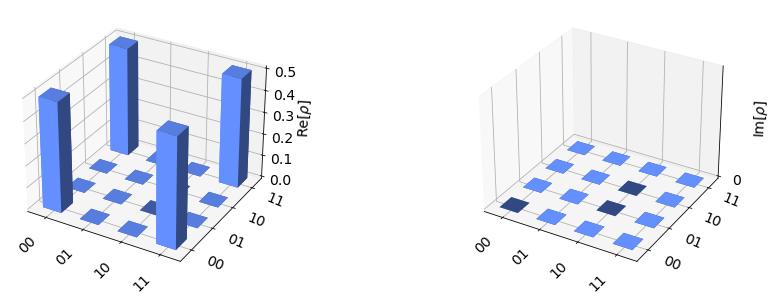

In [10]:
# plot state city
# <INSERT CODE>
plot_state_city(psi)

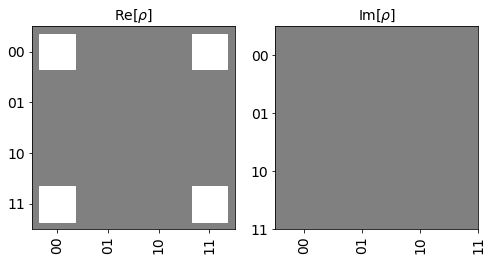

In [11]:
# plot state hinton
# <INSERT CODE>
plot_state_hinton(psi)

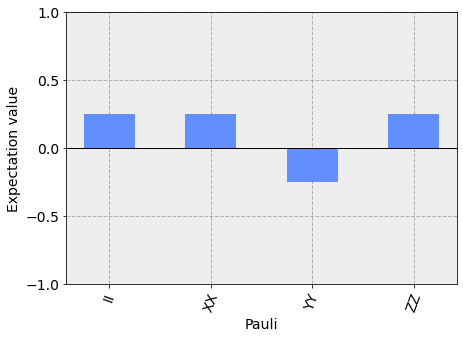

In [12]:
# plot state paulivec
# <INSERT CODE>
plot_state_paulivec(psi)

#### Circuit Visualization

When building a quantum circuit, it often helps to draw the circuit. This is supported natively by a ``QuantumCircuit`` object. You can either call ``print()`` on the circuit, or call the ``draw()`` method on the object.

In [13]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [18]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [19]:
# print circuit
# <INSERT CODE>
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [16]:
# print circuit using draw method
# <INSERT CODE>
circuit.draw()

┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

There are different drawing formats. The parameter output (str) selects the output method to use for drawing the circuit. Valid choices are ``text, mpl, latex, latex_source``. See [qiskit.circuit.QuantumCircuit.draw](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html?highlight=draw)

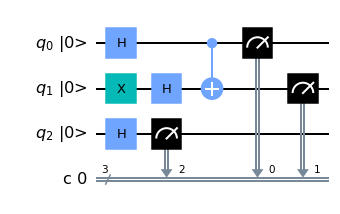

In [17]:
# print circuit using different drawer (mlp for example)
# <INSERT CODE>
circuit.draw(initial_state=True, output='mpl')

##### Disable Plot Barriers and Reversing Bit Order

The first two options are shared among all three backends. They allow you to configure both the bit orders and whether or not you draw barriers. These can be set by the ``reverse_bits`` `kwarg and ``plot_barriers`` kwarg, respectively. The examples below will work with any output backend; mpl is used here for brevity.

In [18]:
# Draw a new circuit with barriers and more registers

q_a = QuantumRegister(3, name='qa')
q_b = QuantumRegister(5, name='qb')
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)

circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

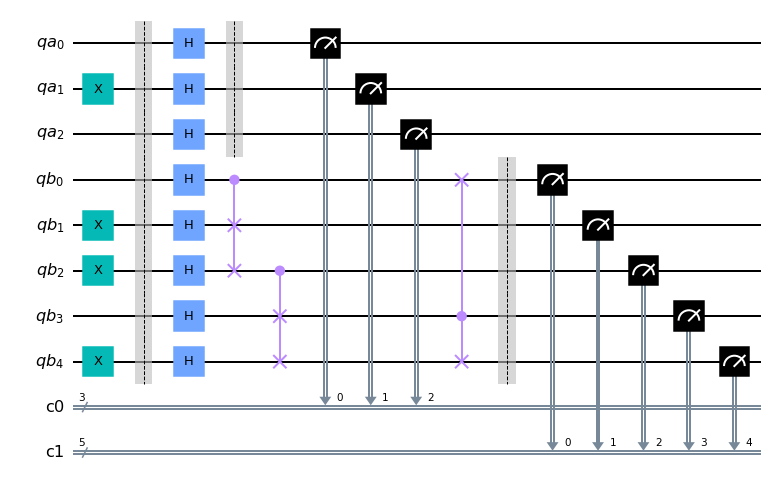

In [19]:
# Draw the circuit
# <INSERT CODE>
circuit.draw(output='mpl')

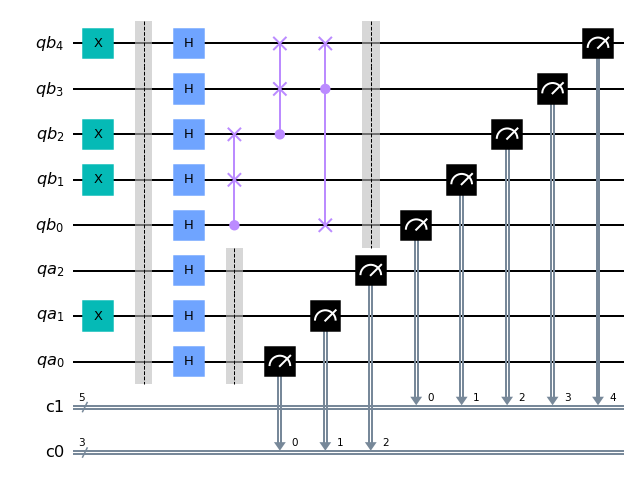

In [20]:
# Draw the circuit with reversed bit order
# <INSERT CODE>
circuit.draw(output='mpl', reverse_bits=True)

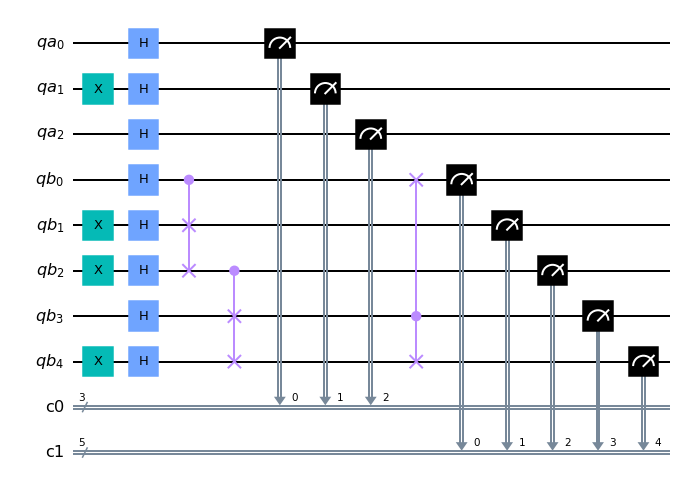

In [21]:
# Draw the circuit without barriers
# <INSERT CODE>
circuit.draw(output='mpl', plot_barriers=False)

##### MPL specific costumizations

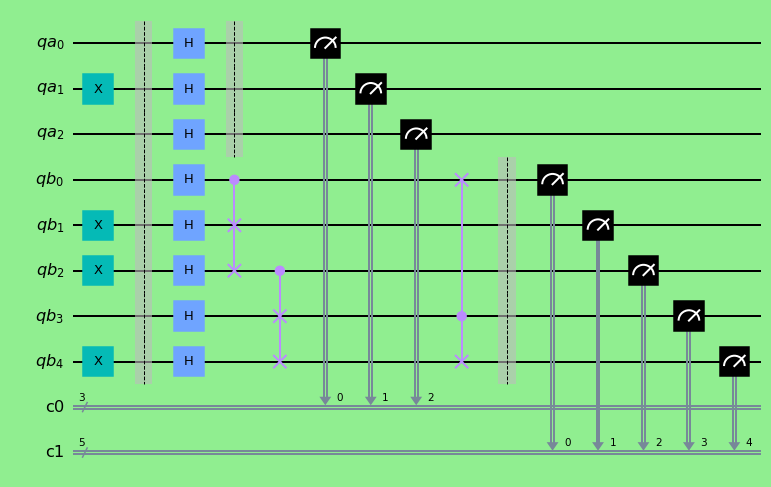

In [23]:
# Change the background color in mpl
# <INSERT CODE>

style = {'backgroundcolor': 'lightgreen'}

circuit.draw(output='mpl', style=style)

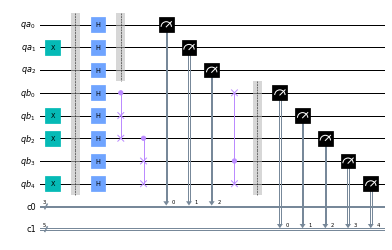

In [24]:
# Scale the mpl output to 1/2 the normal size
# <INSERT CODE>

circuit.draw(output='mpl', scale=0.5)

### Simulators 

Now we will show how to import the Qiskit Aer simulator backend and use it to run ideal (noise free) Qiskit Terra circuits.

In [25]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [26]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [27]:
simulator = Aer.get_backend('aer_simulator')

The default behavior of the ``AerSimulator`` backend is to mimic the execution of an actual device. If a ``QuantumCircuit`` containing measurements is run it will return a count dictionary containing the final values of any classical registers in the circuit. The circuit may contain gates, measurements, resets, conditionals, and other custom simulator instructions 

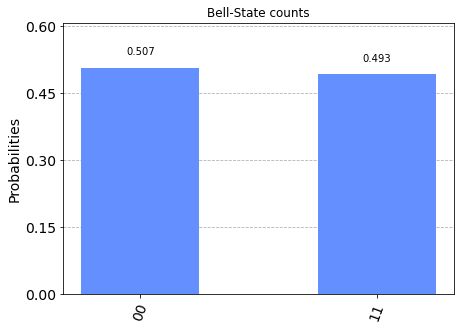

In [28]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [29]:
# Run and get memory (measurement outcomes for each individual shot)
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '00', '11', '00', '00', '00', '11', '00', '11']


##### Simulation methods

The AerSimulator supports a variety of simulation methods, each of which supports a different set of instructions. The method can be set manually using ``simulator.set_option(method=value)`` option, or a simulator backend with a preconfigured method can be obtained directly from the Aer provider using ``Aer.get_backend``.

When simulating ideal circuits, changing the method between the exact simulation methods stabilizer, ``statevector``, ``density_matrix`` and ``matrix_product_state`` should not change the simulation result (other than usual variations from sampling probabilities for measurement outcomes)

Each of these methods determines the internal representation of the quantum circuit and the algorithms used to process the quantum operations. They each have advantages and disadvantages, and choosing the best method is a matter of investigation. 

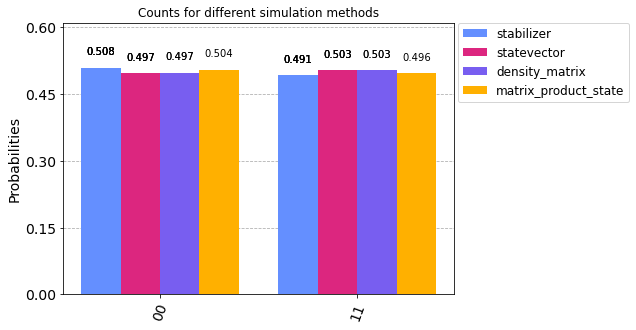

In [30]:
# Increase shots to reduce sampling variance
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=['stabilizer', 'statevector',
                       'density_matrix', 'matrix_product_state'])

The default simulation method is automatic which will automatically select a one of the other simulation methods for each circuit based on the instructions in those circuits. A fixed simulation method can be specified by by adding the method name when getting the backend, or by setting the method option on the backend.

##### Simulation precision

One of the available simulator options allows setting the float precision for the statevector, density_matrix unitary and superop methods. This is done using the ``set_precision="single"`` or ``precision="double" `` (default) option:

In [31]:
# Configure a single-precision statevector simulator backend
simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'00': 498, '11': 526}


##### Device backend noise model simulations

We will now show how to use the Qiskit Aer noise module to automatically generate a basic noise model for an IBMQ hardware device, and use this model to do noisy simulations of QuantumCircuits to study the effects of errors which occur on real devices.

Note, that these automatic models are only an approximation of the real errors that occur on actual devices, due to the fact that they must be build from a limited set of input parameters related to average error rates on gates. The study of quantum errors on real devices is an active area of research and we discuss the Qiskit Aer tools for configuring more detailed noise models in another notebook.

In [32]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

The Qiskit Aer device noise model automatically generates a simplified noise model for a real device. This model is generated using the calibration information reported in the ``BackendProperties`` of a device and takes into account

* The gate_error probability of each basis gate on each qubit.
* The gate_length of each basis gate on each qubit.
* The T1, T2 relaxation time constants of each qubit.
* The readout error probability of each qubit.

We will use real noise data for an IBM Quantum device using the data stored in Qiskit Terra. Specifically, in this tutorial, the device is ``ibmq_vigo```.

In [33]:
from qiskit.test.mock import FakeVigo
device_backend = FakeVigo()

Now we construct a test circuit to compare the output of the real device with the noisy output simulated on the Qiskit Aer AerSimulator. Before running with noise or on the device we show the ideal expected output with no noise.

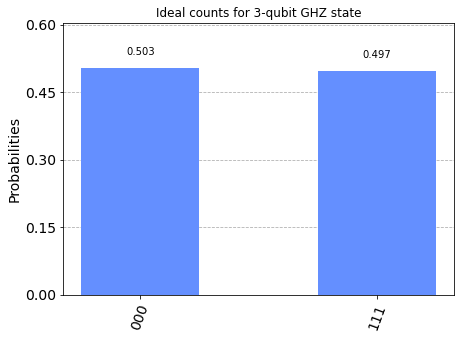

In [34]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

# Create ideal simulator and run
# <INSERT CODE>
sim_ideal = AerSimulator()

result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

How to generate a simulator that mimics a device?

We call ``from_backend`` to create a simulator for ``ibmq_vigo``

In [35]:
# Create simulator from backend 
# <INSERT CODE>
sim_vigo = AerSimulator.from_backend(device_backend)

By storing the device properties in ``vigo_simulator``, we ensure that the appropriate basis gates and coupling map are used when compiling circuits for simulation, thereby most closely mimicking the gates that will be executed on a real device. In addition ``vigo_simulator`` contains an approximate noise model consisting of:

* Single-qubit gate errors consisting of a single qubit depolarizing error followed by a single qubit thermal relaxation error.
* Two-qubit gate errors consisting of a two-qubit depolarizing error followed by single-qubit thermal relaxation errors on both qubits in the gate.
* Single-qubit readout errors on the classical bit value obtained from measurements on individual qubits.

For the gate errors the error parameter of the thermal relaxation errors is derived using the ``thermal_relaxation_error`` function from ``aer.noise.errors module``, along with the individual qubit T1 and T2 parameters, and the ``gate_time`` parameter from the device backend properties. The probability of the depolarizing error is then set so that the combined average gate infidelity from the depolarizing error followed by the thermal relaxation is equal to the ``gate_error`` value from the backend properties.

For the readout errors the probability that the recorded classical bit value will be flipped from the true outcome after a measurement is given by the qubit ``readout_errors``.

Once we have created a noisy simulator backend based on a real device we can use it to run noisy simulations.

Important: When running noisy simulations it is critical to transpile the circuit for the backend so that the circuit is transpiled to the correct noisy basis gate set for the backend.

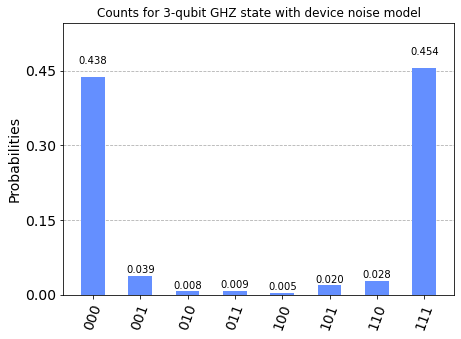

In [36]:
# Transpile the circuit for the noisy basis gates and get results
# <INSERT CODE>
tcirc = transpile(circ, sim_vigo)

result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

You may also be interested in:
* Building Noise Models https://qiskit.org/documentation/tutorials/simulators/3_building_noise_models.html
* Applying noise to custom unitary gates https://qiskit.org/documentation/tutorials/simulators/4_custom_gate_noise.html

Usefull operations with circuits

In [255]:
qc = QuantumCircuit(12)
for idx in range(5):
    qc.h(idx)
    qc.cx(idx, idx+5)

qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw()

┌───┐                                                           
 q_0: ┤ H ├──■────────────────────────────────────────────────────────
      ├───┤  │                                                        
 q_1: ┤ H ├──┼────■───────────────────■────■─────────■────────────────
      ├───┤  │    │                   │    │         │                
 q_2: ┤ H ├──┼────┼────■──────────────┼────┼─────────┼────────────────
      ├───┤  │    │    │              │    │         │                
 q_3: ┤ H ├──┼────┼────┼────■─────────┼────┼─────────┼────────────────
      ├───┤  │    │    │    │         │    │         │                
 q_4: ┤ H ├──┼────┼────┼────┼────■────┼────┼─────────┼────────────────
      └───┘┌─┴─┐  │    │    │    │    │    │         │                
 q_5: ─────┤ X ├──┼────┼────┼────┼────┼────┼─────────┼────────────────
           └───┘┌─┴─┐  │    │    │    │    │         │           ┌───┐
 q_6: ──────────┤ X ├──┼────┼────┼────┼────┼─────────┼───X──X──X─┤ X ├
                └───┘┌─┴─┐  │    │  ┌─┴─┐  │  ┌───┐  │   │  │  │ └───┘
 q_7: ───────────────┤ X ├──┼────┼──┤ X ├──┼──┤ X ├──┼───┼──┼──┼──────
                     └───┘┌─┴─┐  │  ├───┤  │  └───┘  │   │  │  │      
 q_8: ────────────────────┤ X ├──┼──┤ X ├──┼─────────┼───┼──┼──┼──────
                          └───┘┌─┴─┐└───┘┌─┴─┐       │   │  │  │      
 q_9: ─────────────────────────┤ X ├─────┤ X ├───────┼───┼──X──┼──────
                               └───┘     └───┘       │   │     │      
q_10: ───────────────────────────────────────────────┼───┼─────X──────
                                                   ┌─┴─┐ │            
q_11: ─────────────────────────────────────────────┤ X ├─X────────────
                                                   └───┘

In [40]:
# width of circuit
# <INSERT CODE>

qc.width()

12

In [41]:
# number of qubits
# <INSERT CODE>

qc.num_qubits

12

In [42]:
# count of operations
# <INSERT CODE>

qc.count_ops()

OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])

In [43]:
# size of circuit
# <INSERT CODE>

qc.size()

19

In [44]:
# depth of circuit
# <INSERT CODE>

qc.depth()

9

#### Final statevector

In [46]:
# Saving the final statevector
# Construct quantum circuit without measure

from qiskit.visualization import array_to_latex

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
# save statevector, run circuit and get results
# <INSERT CODE>
circuit.save_statevector()

backend = Aer.get_backend('aer_simulator')
result = backend.run(circuit).result()
array_to_latex(result.get_statevector())

<IPython.core.display.Latex object>

In [47]:
# Saving the circuit unitary
# Construct quantum circuit without measure

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
# save unitary, run circuit and get results
# <INSERT CODE>
circuit.save_unitary()

result = backend.run(circuit).result()
array_to_latex(result.get_unitary())

<IPython.core.display.Latex object>

Saving multiple statevectors

In [48]:
# Saving multiple states
# Construct quantum circuit without measure

steps = 5
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')
    circ.rx(i * np.pi / steps, 0)
circ.save_statevector(label=f'psi_{steps}')

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
data = result.data(0)
data

{'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_5': Statevector([-1.+0.00000000e+00j,  0.-2.77555756e-16j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,))}

Saving custom statevector

In [49]:
# Generate a random statevector
num_qubits = 2
psi = qi.random_statevector(2 ** num_qubits, seed=100)

# Set initial state to generated statevector
circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'statevector': Statevector([ 0.18572453-0.03102771j, -0.26191269-0.18155865j,
               0.12367038-0.47837907j,  0.66510011-0.4200986j ],
             dims=(2, 2))}

### Parametric circuits

In [256]:
# Parameterized Quantum Circuits 

from qiskit.circuit import Parameter

# create parameter and use it in circuit
# <INSERT CODE>
theta = Parameter('theta')

circuit = QuantumCircuit(1)
circuit.rx(theta, 0)
circuit.measure_all()
circuit.draw()

┌───────────┐ ░ ┌─┐
     q: ┤ Rx(theta) ├─░─┤M├
        └───────────┘ ░ └╥┘
meas: 1/═════════════════╩═
                         0

In [52]:
res = sim.run(circuit, parameter_binds=[{theta: [np.pi/2, np.pi, 0]}]).result()  # Different bindings
res.get_counts()

[{'0': 520, '1': 504}, {'1': 1024}, {'0': 1024}]

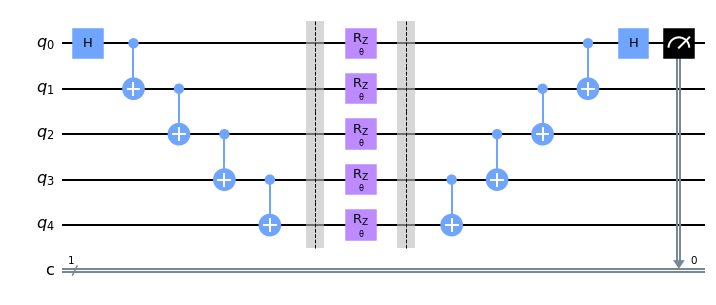

In [53]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

In [54]:
#We can inspect the circuit’s parameters
# <INSERT CODE>
print(qc.parameters)

ParameterView([Parameter(θ)])


All circuit parameters must be bound before sending the circuit to a backend. This can be done as follows: - The``bind_parameters`` method accepts a dictionary mapping ``Parameter``s to values, and returns a new circuit with each parameter replaced by its corresponding value. Partial binding is supported, in which case the returned circuit will be parameterized by any ``Parameter``s that were not mapped to a value.

In [56]:
import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw()

┌───┐                     ░ ┌────────┐ ░                     ┌───┐┌─┐
q_0: ┤ H ├──■──────────────────░─┤ Rz(2π) ├─░──────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐                ░ ├────────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──■─────────────░─┤ Rz(2π) ├─░─────────────■──┤ X ├──────╫─
          └───┘┌─┴─┐           ░ ├────────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: ──────────┤ X ├──■────────░─┤ Rz(2π) ├─░────────■──┤ X ├───────────╫─
               └───┘┌─┴─┐      ░ ├────────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: ───────────────┤ X ├──■───░─┤ Rz(2π) ├─░───■──┤ X ├────────────────╫─
                    └───┘┌─┴─┐ ░ ├────────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: ────────────────────┤ X ├─░─┤ Rz(2π) ├─░─┤ X ├─────────────────────╫─
                         └───┘ ░ └────────┘ ░ └───┘                     ║ 
c: 1/═══════════════════════════════════════════════════════════════════╩═
                                                                        0

In [57]:
backend = Aer.get_backend('aer_simulator')
job = backend.run(transpile(circuits, backend))
counts = job.result().get_counts()

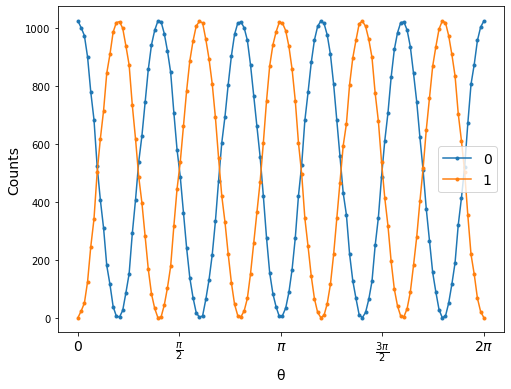

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

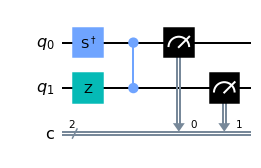

In [59]:
# Random Circuit

from qiskit.circuit.random import random_circuit

# create random circuit
# <INSERT CODE>

circ = random_circuit(2, 2, measure=True)
circ.draw(output='mpl')

In [62]:
# add unitary matrix to circuit
matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]
    
# <INSERT CODE>
circuit = QuantumCircuit(2)
circuit.unitary(matrix, [0, 1])
circuit.draw()

┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘

In [27]:
# Classical logic
from qiskit.circuit import classical_function, Int1

@classical_function
def oracle(x: Int1, y: Int1, z: Int1) -> Int1:
    return not x and (y or z)

circuit = QuantumCircuit(4)
circuit.append(oracle, [0, 1, 2, 3])
circuit.draw()
#circuit.decompose().draw() #synthesis

┌─────────┐
q_0: ┤0        ├
     │         │
q_1: ┤1        ├
     │  Oracle │
q_2: ┤2        ├
     │         │
q_3: ┤3        ├
     └─────────┘

In [66]:
# Classical logic
from qiskit.circuit import classical_function, Int1

@classical_function
def oracle(x: Int1) -> Int1:
    return not x

circuit = QuantumCircuit(2)
circuit.append(oracle, [0, 1])
circuit.draw()

┌─────────┐
q_0: ┤0        ├
     │  Oracle │
q_1: ┤1        ├
     └─────────┘

In [67]:
circuit.decompose().draw()

q_0: ──o──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html

## 3. Quantum info, circuit lib and algorithms


### Circuit lib

In [29]:
from qiskit.circuit.library import InnerProduct, QuantumVolume, clifford_6_2, C3XGate

In [30]:
# inner product circuit
# <INSERT CODE>

InnerProduct(3).decompose().draw()

q0_0: ─■───────
       │       
q0_1: ─┼──■────
       │  │    
q0_2: ─┼──┼──■─
       │  │  │ 
q1_0: ─■──┼──┼─
          │  │ 
q1_1: ────■──┼─
             │ 
q1_2: ───────■─

In [114]:
clifford_6_2().draw()

┌───┐                    
q_0: ┤ S ├──■───────────■───■─
     ├───┤┌─┴─┐┌─────┐┌─┴─┐ │ 
q_1: ┤ S ├┤ X ├┤ Sdg ├┤ X ├─■─
     └───┘└───┘└─────┘└───┘

### Quantum info

- Operators
- Simplectic
  - Pauli
  - Clifford
- Measures

In [76]:
from qiskit.quantum_info.operators import Operator

# Create an operator
# <INSERT CODE>
XX = Operator([
    [0, 0, 0, 1], 
    [0, 0, 1, 0], 
    [0, 1, 0, 0], 
    [1, 0, 0, 0]
])

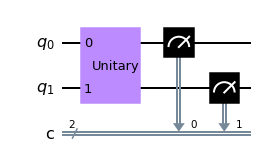

In [77]:
# add operator to circuit
# <INSERT CODE>
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
circ.draw('mpl')

In [68]:
# Pauli
from qiskit.quantum_info.operators import Pauli

# use Pauli operator
# <INSERT CODE>
circuit = QuantumCircuit(4)
IXYZ = Pauli('IXYZ')
circuit.append(IXYZ, [0, 1, 2, 3])
circuit.draw()
# circuit.decompose().draw()

┌──────────────┐
q_0: ┤0             ├
     │              │
q_1: ┤1             ├
     │  Pauli(IXYZ) │
q_2: ┤2             ├
     │              │
q_3: ┤3             ├
     └──────────────┘

In [61]:
# Pauli with phase 
from qiskit.quantum_info.operators import Pauli

circuit = QuantumCircuit(4)
iIXYZ = Pauli('iIXYZ')  # ['', '-i', '-', 'i']
circuit.append(iIXYZ, [0, 1, 2, 3])
circuit.draw()

┌────────┐
q_0: ┤0       ├
     │        │
q_1: ┤1       ├
     │  iIXYZ │
q_2: ┤2       ├
     │        │
q_3: ┤3       ├
     └────────┘

In [81]:
# create clifford
from qiskit.quantum_info import random_clifford

# random clifford
# <INSERT CODE>
clifford = random_clifford(3, 3)
clifford.to_circuit().draw()

┌───┐┌─────┐┌───┐     ┌─────┐┌───┐     ┌─────┐┌───┐
q_0: ┤ X ├┤ Sdg ├┤ H ├──■──┤ Sdg ├┤ H ├──■──┤ Sdg ├┤ H ├
     ├───┤└┬───┬┘└───┘  │  └─────┘└───┘┌─┴─┐└┬───┬┘├───┤
q_1: ┤ H ├─┤ S ├────────┼──────────────┤ X ├─┤ H ├─┤ S ├
     ├───┤ ├───┤      ┌─┴─┐            └───┘ └───┘ └───┘
q_2: ┤ Z ├─┤ S ├──────┤ X ├─────────────────────────────
     └───┘ └───┘      └───┘

In [83]:
# stabilizer and destabilizer 
# <INSERT CODE>
clifford.to_dict()

{'stabilizer': ['-XZZ', '+IXX', '+ZZY'],
 'destabilizer': ['+XIX', '+IYX', '-YZY']}

### Algorithms

Next logical step in terms of abstractions will be algorithms

It contains a collection of quantum algorithms, for use with quantum computers, to
carry out research and investigate how to solve problems in different domains on
near-term quantum devices with short depth circuits.

Algorithms configuration includes the use of `qiskit.algorithms.optimizers` which
were designed to be swappable sub-parts of an algorithm. Any component and may be exchanged for
a different implementation of the same component type in order to potentially alter the behavior
and outcome of the algorithm.

Quantum algorithms are run via a `qiskit.algorithms.QuantumInstance`
which must be set with the
desired backend where the algorithm's circuits will be executed and be configured with a number of
compile and runtime parameters controlling circuit compilation and execution.

#### VQE

For instance with VQE, the Variational Quantum Eigensolver, it takes a trial wavefunction, in the form of a QuantumCircuit and a classical optimizer among other things.

Let’s take a look at an example to construct a VQE instance. Here TwoLocal is the variational form (trial wavefunction), a parameterized circuit which can be varied, and SLSQP a classical optimizer. These are created as separate instances and passed to VQE when it is constructed. Trying, for example, a different classical optimizer, or variational form is simply a case of creating an instance of the one you want and passing it into VQE.

In [193]:
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

num_qubits = 2
ansatz = TwoLocal(num_qubits, 'ry', 'cz')
opt = SLSQP(maxiter=1000)
vqe = VQE(ansatz, optimizer=opt)

In [194]:
from qiskit.opflow import X, Z, I

H2_op = (-1.052373245772859 * I ^ I) + \
        (0.39793742484318045 * I ^ Z) + \
        (-0.39793742484318045 * Z ^ I) + \
        (-0.01128010425623538 * Z ^ Z) + \
        (0.18093119978423156 * X ^ X)

So let’s build a VQE instance passing a backend using a QuantumInstance, to the constructor. Now VQE does have setters so the QuantumInstance can also be passed later.

Note: In order that you can run this notebook and see the exact same output the random number generator used throughout algorithms in algorithms_globals, as well as the transpiler and simulator, via the QuantumInstance, are seeded. You do not have to do this but if want to be able to reproduce the exact same outcome each time then this is how it’s done.

So let’s run VQE and print the result object it returns.

In [195]:
from qiskit.utils import algorithm_globals
seed = 50
algorithm_globals.random_seed = seed
qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)

ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
slsqp = SLSQP(maxiter=1000)
vqe = VQE(ansatz, optimizer=slsqp, quantum_instance=qi)
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 65,
    'eigenstate': array([ 9.54859815e-05+0.j, -9.93766272e-01+0.j,  1.11483572e-01+0.j,
        1.76682876e-05+0.j]),
    'eigenvalue': (-1.8572750175756148+0j),
    'optimal_parameters': {   ParameterVectorElement(θ[7]): 0.3602072002159604,
                              ParameterVectorElement(θ[4]): -2.5983258549202275,
                              ParameterVectorElement(θ[5]): 1.5683258675929213,
                              ParameterVectorElement(θ[6]): -4.717618294069471,
                              ParameterVectorElement(θ[0]): 4.296520381438198,
                              ParameterVectorElement(θ[2]): 0.5470752823568583,
                              ParameterVectorElement(θ[3]): 6.092947734908081,
                              ParameterVectorElement(θ[1]): 4.426962193808709},
    'optimal_point': array([ 4.29652038,  4.42696219,  0.54707528,  6.09294773, -2.59832585,
        1.56832587, -4.71761829,  0.3

From the above result we can see it took the optimizer 65 evaluations of parameter values until it found the minimum eigenvalue of -1.85727 which is the electronic ground state energy of the given H2 molecule. The optimal parameters of the ansatz can also be seen which are the values that were in the ansatz at the minimum value.

#### Grover's algorithm

Grover’s algorithm uses the Grover operator Q to amplify the amplitudes of the good states:

\begin{equation}\mathcal{Q} = \mathcal{A}\mathcal{S_0}\mathcal{A}^\dagger \mathcal{S_f}\end{equation}
Here, A is the initial search state for the algorithm, which is just Hadamards, H^n for the textbook Grover search, but can be more elaborate for Amplitude Amplification * \mathcal{S_0} is the reflection about the all 0 state

\begin{split}|x\rangle \mapsto \begin{cases} -|x\rangle, &x \neq 0 \\ |x\rangle, &x = 0\end{cases}\end{split}

S_f is the oracle that applies

\begin{split}|x\rangle \mapsto (-1)^{f(x)}|x\rangle\end{split}
    　where f(x) is 1 if x is a good state and otherwise 0.

In a nutshell, Grover’s algorithm applies different powers of \mathcal{Q} and after each execution checks whether a good solution has been found.

In [124]:
from qiskit.algorithms import Grover
from qiskit.algorithms import AmplificationProblem


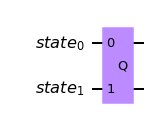

In [125]:
# the state we desire to find is '11'
good_state = ['11']

# specify the oracle that marks the state '11' as a good solution
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)

# now we can have a look at the Grover operator that is used in running the algorithm
problem.grover_operator.draw(output='mpl')

In [130]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover

aer_simulator = Aer.get_backend('aer_simulator')
grover = Grover(quantum_instance=aer_simulator)
result = grover.amplify(problem)
print('Result type:', type(result))
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Result type: <class 'qiskit.algorithms.amplitude_amplifiers.grover.GroverResult'>
Success!
Top measurement: 11


## 4. Transpiling, pulse and opflow


### Compiling circuits

In [131]:
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

[('ibmq_qasm_simulator', 32),
 ('ibmq_armonk', 1),
 ('ibmq_santiago', 5),
 ('ibmq_bogota', 5),
 ('ibmq_lima', 5),
 ('ibmq_belem', 5),
 ('ibmq_quito', 5),
 ('simulator_statevector', 32),
 ('simulator_mps', 100),
 ('simulator_extended_stabilizer', 63),
 ('simulator_stabilizer', 5000),
 ('ibmq_manila', 5)]

In [134]:
from qiskit.tools.jupyter import *
%qiskit_backend_overview

In [135]:
from qiskit.providers.ibmq import least_busy

# get least busy backend
# <INSERT CODE>
backend = least_busy(provider.backends(
                simulator=False,
                filters=lambda b: b.configuration().n_qubits >= 2))
backend

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [137]:
# bell state
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

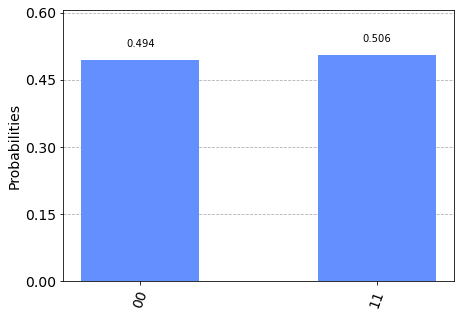

In [139]:
# run it in simulator
sim = Aer.get_backend('aer_simulator')
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)

In [140]:
# run on least busy backend
# <INSERT CODE>
job = backend.run(circuit)

In [141]:
# get results
# <INSERT CODE>

job.result()

IBMQJobFailureError: "Unable to retrieve result for job 61d4a3216ae433d94795ee35. Job has failed: The Qobj uses gates (['h']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

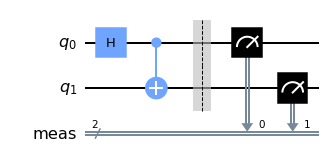

In [142]:
circuit.draw('mpl')

In [143]:
from qiskit import transpile

# transpile with specified backend
# <INSERT CODE>

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                           └───┘ ░  ║ └╥┘
ancilla_0 -> 2 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_2 -> 4 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
       meas: 2/═════════════════════════════════════╩══╩═
                                                    0  1

In [144]:
# rerun job
# <INSERT CODE>

job = backend.run(transpiled_circuit)

In [145]:
# job status
# <INSERT CODE>
job.status()

<JobStatus.QUEUED: 'job is queued'>

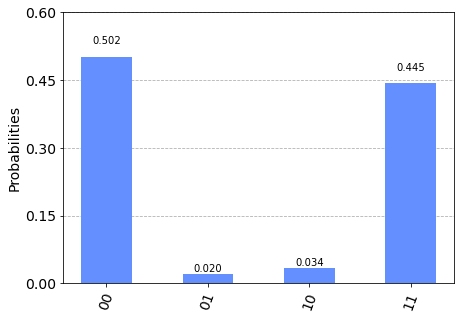

In [146]:
# get results
# <INSERT CODE>

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

global phase: π/4
         ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
         └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                     └───┘ ░  ║ └╥┘
 meas: 2/═════════════════════════════════════╩══╩═
                                              0  1

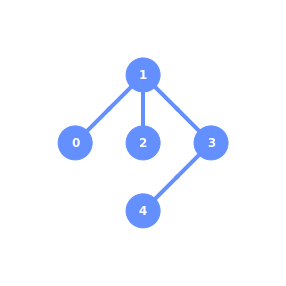

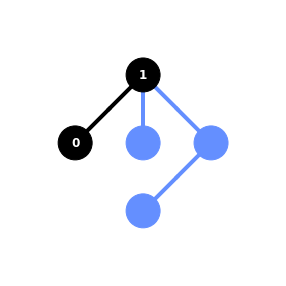

In [147]:
from qiskit.visualization import plot_circuit_layout, plot_gate_map

display(transpiled_circuit.draw(idle_wires=False))
display(plot_gate_map(backend))
plot_circuit_layout(transpiled_circuit, backend)

In [155]:
# a slightly more interesting example:
circuit = QuantumCircuit(3)
circuit.h([0,1,2])
circuit.ccx(0, 1, 2)
circuit.h([0,1,2])
circuit.ccx(2, 0, 1)
circuit.h([0,1,2])
circuit.measure_all()
circuit.draw()

┌───┐     ┌───┐     ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■──┤ H ├──■──┤ H ├─░─┤M├──────
        ├───┤  │  ├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├──■──┤ H ├┤ X ├┤ H ├─░──╫─┤M├───
        ├───┤┌─┴─┐├───┤└─┬─┘├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ X ├┤ H ├──■──┤ H ├─░──╫──╫─┤M├
        └───┘└───┘└───┘     └───┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════╩══╩══╩═
                                     0  1  2

In [156]:
transpiled = transpile(circuit, backend)
transpiled.draw(idle_wires=False, fold=-1)

global phase: 3π/2
                                     ┌───┐┌──────────┐     ┌───┐                          ┌─────────┐                        ┌───┐   ┌──────────┐┌───┐                            ┌───┐┌──────────┐     ┌───┐                          ┌─────────┐                        ┌───┐   ┌──────────┐┌───┐┌─────────┐┌────┐┌─────────┐ ░ ┌─┐      
q_2 -> 0 ────────────────────────────┤ X ├┤ Rz(-π/4) ├──■──┤ X ├──■────────────────────■──┤ Rz(π/4) ├────────────────────────┤ X ├───┤ Rz(-π/4) ├┤ X ├────────────────────────────┤ X ├┤ Rz(-π/4) ├──■──┤ X ├──■────────────────────■──┤ Rz(π/4) ├────────────────────────┤ X ├───┤ Rz(-π/4) ├┤ X ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤M├──────
         ┌─────────┐┌────┐┌─────────┐└─┬─┘└──────────┘┌─┴─┐└─┬─┘┌─┴─┐┌───┐┌─────────┐┌─┴─┐├─────────┴┐┌───┐     ┌───┐        └─┬─┘   ├─────────┬┘└─┬─┘┌─────────┐┌────┐┌─────────┐└─┬─┘└──────────┘┌─┴─┐└─┬─┘┌─┴─┐┌───┐┌─────────┐┌─┴─┐├─────────┴┐┌───┐     ┌───┐        └─┬─┘   ├─────────┬┘└─┬─┘├─────────┤├────┤├─────────┤ ░ └╥┘   ┌─┐
q_1 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──────────────┤ X ├──■──┤ X ├┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├┤ X ├──■──┤ X ├──■───────■─────┤ Rz(π/4) ├───■──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──────────────┤ X ├──■──┤ X ├┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├┤ X ├──■──┤ X ├──■───────■─────┤ Rz(π/4) ├───■──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫────┤M├
         ├─────────┤├────┤├─────────┤                 └───┘     └───┘└─┬─┘└─────────┘└───┘└──────────┘└─┬─┘┌─┴─┐└─┬─┘┌─┴─┐┌─────────┐└─────────┘      └─────────┘└────┘└─────────┘                 └───┘     └───┘└─┬─┘└─────────┘└───┘└──────────┘└─┬─┘┌─┴─┐└─┬─┘┌─┴─┐┌─────────┐└─────────┘      └─────────┘└────┘└─────────┘ ░  ║ ┌─┐└╥┘
q_0 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──────────────────────────────────■────────────────────────────────■──┤ X ├──■──┤ X ├┤ Rz(π/4) ├───────────────────────────────────────────────────────────────────────────────■────────────────────────────────■──┤ X ├──■──┤ X ├┤ Rz(π/4) ├──────────────────────────────────────────────░──╫─┤M├─╫─
         └─────────┘└────┘└─────────┘                                                                      └───┘     └───┘└─────────┘                                                                                                                   └───┘     └───┘└─────────┘                                              ░  ║ └╥┘ ║ 
 meas: 3/══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                                                                                                                                                                                                                   0  1  2

In [157]:
# Initial layout

In [257]:
# transpiling with initial layout 
# <INSERT CODE>

transpiled = transpile(circuit, backend, initial_layout=[0, 2, 3])
display(plot_circuit_layout(transpiled, backend))
plot_gate_map(backend)

LayoutError: 'Integer list length (3) must equal number of qubits in circuit (1): [0, 2, 3].'

In [159]:
transpiled.draw(idle_wires=False, fold=-1)

global phase: 3π/2
               ┌─────────┐┌────┐┌─────────┐                                                                       ┌───┐     ┌─────────┐                                                              ┌───┐                                         ┌─────────┐                        ┌───┐   ┌──────────┐┌───┐┌─────────┐┌────┐┌─────────┐ ░ ┌─┐      
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├────────────────────────────────────────■──────────────────────────────┤ X ├──■──┤ Rz(π/4) ├───────────────────────────────────────────────────────■──────┤ X ├──■───────────────────────────────────■──┤ Rz(π/4) ├────────────────────────┤ X ├───┤ Rz(-π/4) ├┤ X ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤M├──────
               └─────────┘└────┘└─────────┘┌───┐                ┌───┐┌──────────┐┌─┴─┐┌─────────┐┌───┐┌──────────┐└─┬─┘┌─┴─┐└─────────┘┌─────────┐      ┌─────────┐┌────┐┌─────────┐        ┌─┴─┐    └─┬─┘┌─┴─┐                     ┌───┐     ┌─┴─┐├─────────┴┐┌───┐     ┌───┐        └─┬─┘   ├─────────┬┘└─┬─┘├─────────┤├────┤├─────────┤ ░ └╥┘   ┌─┐
ancilla_0 -> 1 ─────────────■──────────────┤ X ├─────────────■──┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├──■──┤ X ├─────■─────┤ Rz(π/4) ├───■──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■─────┤ X ├──────■──┤ X ├──■───────────────■──┤ X ├──■──┤ X ├┤ Rz(-π/4) ├┤ X ├──■──┤ X ├──■───────■─────┤ Rz(π/4) ├───■──┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫────┤M├
               ┌─────────┐  │      ┌────┐  └─┬─┘┌─────────┐  │  └─┬─┘└──────────┘└───┘└─────────┘└─┬─┘├─────────┬┘     └───┘   ┌─┴─┐   ├─────────┴┐┌─┴─┐└─────────┘└────┘└─────────┘┌─┴─┐┌──┴───┴───┐     └───┘┌─┴─┐┌─────────┐┌─┴─┐└─┬─┘┌─┴─┐└───┘└──────────┘└─┬─┘┌─┴─┐└─┬─┘┌─┴─┐┌─────────┐└─────────┘      └─────────┘└────┘└─────────┘ ░  ║ ┌─┐└╥┘
      q_1 -> 2 ┤ Rz(π/2) ├──┼──────┤ √X ├────┼──┤ Rz(π/2) ├──┼────■────────────────────────────────■──┤ Rz(π/4) ├──────────────┤ X ├───┤ Rz(-π/4) ├┤ X ├────────────────────────────┤ X ├┤ Rz(-π/4) ├──────────┤ X ├┤ Rz(π/4) ├┤ X ├──■──┤ X ├───────────────────■──┤ X ├──■──┤ X ├┤ Rz(π/4) ├──────────────────────────────────────────────░──╫─┤M├─╫─
               └─────────┘┌─┴─┐    └────┘    │  └─────────┘┌─┴─┐                                      └─────────┘              └───┘   └──────────┘└───┘                            └───┘└──────────┘          └───┘└─────────┘└───┘     └───┘                      └───┘     └───┘└─────────┘                                              ░  ║ └╥┘ ║ 
      q_2 -> 3 ───────────┤ X ├──────────────■─────────────┤ X ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──╫──╫──╫─
                          └───┘                            └───┘                                                                                                                                                                                                                                                                            ░  ║  ║  ║ 
       meas: 3/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                                                                                                                                                                                                                               0  1  2

### Optimization level

Higher levels generate more optimized circuits, at the expense of longer transpilation time.

 * 0: no explicit optimization other than mapping to backend
 * 1: light optimization by simple adjacent gate collapsing.(default)
 * 2: medium optimization by noise adaptive qubit mapping and gate cancellation using commutativity rules.
 * 3: heavy optimization by noise adaptive qubit mapping and gate cancellation using commutativity rules and unitary synthesis.

In [160]:
level0 = transpile(circuit, backend, optimization_level=0)
level1 = transpile(circuit, backend, optimization_level=1)
level2 = transpile(circuit, backend, optimization_level=2)
level3 = transpile(circuit, backend, optimization_level=3)

In [161]:
for level in [level0, level1, level2, level3]:
    print(level.count_ops()['cx'], level.depth())

30 52
30 45
24 41
17 40


In [162]:
# transpiling is a stochastic process

In [166]:
transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=42)
transpiled.depth()

41

In [167]:
transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=1)
transpiled.depth()

36

In [168]:
# Playing with other transpiler options (without a backend)

In [169]:
transpiled = transpile(circuit)
transpiled.draw(fold=-1)

┌───┐     ┌───┐     ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■──┤ H ├──■──┤ H ├─░─┤M├──────
        ├───┤  │  ├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├──■──┤ H ├┤ X ├┤ H ├─░──╫─┤M├───
        ├───┤┌─┴─┐├───┤└─┬─┘├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ X ├┤ H ├──■──┤ H ├─░──╫──╫─┤M├
        └───┘└───┘└───┘     └───┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════╩══╩══╩═
                                     0  1  2

In [170]:
# Set a basis gates

In [171]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

In [172]:
# specify basis gates
# <INSERT CODE>

transpiled = transpile(circuit, basis_gates=['x', 'cx', 'h', 'p'])
transpiled.draw(fold=-1)

┌───┐                                                                    ┌────────┐     ┌───┐                                          ┌────────┐               ┌───┐┌─────────┐     ┌───┐┌───┐ ░ ┌─┐      
   q_0: ┤ H ├───────────────────────■──────────────────────────────■──────■──────┤ P(π/4) ├──■──┤ H ├───────■──────────────────────────────■───┤ P(π/4) ├───────────────┤ X ├┤ P(-π/4) ├─────┤ X ├┤ H ├─░─┤M├──────
        ├───┤                       │                  ┌────────┐  │    ┌─┴─┐   ┌┴────────┤┌─┴─┐├───┤┌───┐┌─┴─┐┌─────────┐┌───┐┌────────┐┌─┴─┐┌┴────────┤┌───┐┌────────┐└─┬─┘└──┬───┬──┘┌───┐└─┬─┘└───┘ ░ └╥┘┌─┐   
   q_1: ┤ H ├───────■───────────────┼──────────────■───┤ P(π/4) ├──┼────┤ X ├───┤ P(-π/4) ├┤ X ├┤ H ├┤ H ├┤ X ├┤ P(-π/4) ├┤ X ├┤ P(π/4) ├┤ X ├┤ P(-π/4) ├┤ X ├┤ P(π/4) ├──┼─────┤ H ├───┤ H ├──┼────────░──╫─┤M├───
        ├───┤┌───┐┌─┴─┐┌─────────┐┌─┴─┐┌────────┐┌─┴─┐┌┴────────┤┌─┴─┐┌─┴───┴──┐└──┬───┬──┘├───┤└───┘└───┘└───┘└─────────┘└─┬─┘└────────┘└───┘└─────────┘└─┬─┘└────────┘  │   ┌─┴───┴──┐└───┘  │  ┌───┐ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤ H ├┤ X ├┤ P(-π/4) ├┤ X ├┤ P(π/4) ├┤ X ├┤ P(-π/4) ├┤ X ├┤ P(π/4) ├───┤ H ├───┤ H ├────────────────────────────■──────────────────────────────■──────────────■───┤ P(π/4) ├───────■──┤ H ├─░──╫──╫─┤M├
        └───┘└───┘└───┘└─────────┘└───┘└────────┘└───┘└─────────┘└───┘└────────┘   └───┘   └───┘                                                                              └────────┘          └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                                                                                           0  1  2

In [173]:
# Set a coupling map

In [174]:
backend.configuration().coupling_map

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]

In [175]:
from qiskit.transpiler import CouplingMap

# specify coupling map
# <INSERT CODE>

transpiled = transpile(circuit, coupling_map=CouplingMap([(0,1),(1,2)]))
transpiled.draw(fold=-1)

┌───┐┌───┐┌───┐     ┌───┐┌─────┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌─────┐┌───┐          ┌───┐┌───┐ ┌───┐ ┌───┐                                         ┌───┐                     ┌───┐┌───┐┌───┐                            ░    ┌─┐   
q_2 -> 0 ┤ H ├┤ H ├┤ H ├──■──┤ H ├┤ Tdg ├┤ H ├──■──┤ H ├┤ T ├┤ H ├──■──┤ H ├┤ Tdg ├┤ H ├───────■──┤ H ├┤ T ├─┤ H ├─┤ H ├──────────────────X──────────────────■───┤ T ├──────────────────X──┤ T ├┤ H ├┤ H ├────────────────────────────░────┤M├───
         ├───┤├───┤└───┘┌─┴─┐├───┤└─────┘├───┤┌─┴─┐├───┤└───┘├───┤┌─┴─┐├───┤└┬───┬┘└───┘┌───┐┌─┴─┐├───┤└───┘ ├───┤ └───┘┌───┐             │                ┌─┴─┐┌┴───┴┐┌───┐     ┌───┐  │  ├───┤└───┘├───┤┌─────┐┌───┐     ┌───┐┌───┐ ░ ┌─┐└╥┘   
q_1 -> 1 ┤ H ├┤ H ├─────┤ X ├┤ H ├───X───┤ H ├┤ X ├┤ H ├──X──┤ H ├┤ X ├┤ H ├─┤ T ├───X──┤ H ├┤ X ├┤ H ├──■───┤ T ├───■──┤ H ├───────■─────X─────■────────X─┤ X ├┤ Tdg ├┤ H ├──■──┤ H ├──X──┤ H ├──■──┤ H ├┤ Tdg ├┤ H ├──■──┤ H ├┤ H ├─░─┤M├─╫────
         ├───┤└───┘     └───┘└───┘   │   └───┘└───┘└───┘  │  └───┘└───┘└───┘ └───┘   │  └───┘└───┘└───┘┌─┴─┐┌┴───┴┐┌─┴─┐├───┤┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐ │ ├───┤└─────┘└───┘┌─┴─┐├───┤┌───┐└───┘┌─┴─┐├───┤└┬───┬┘├───┤┌─┴─┐├───┤├───┤ ░ └╥┘ ║ ┌─┐
q_0 -> 2 ┤ H ├───────────────────────X────────────────────X──────────────────────────X─────────────────┤ X ├┤ Tdg ├┤ X ├┤ H ├┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─X─┤ H ├────────────┤ X ├┤ H ├┤ H ├─────┤ X ├┤ H ├─┤ T ├─┤ H ├┤ X ├┤ H ├┤ H ├─░──╫──╫─┤M├
         └───┘                                                                                         └───┘└─────┘└───┘└───┘└───┘└───┘└─────┘└───┘└───┘   └───┘            └───┘└───┘└───┘     └───┘└───┘ └───┘ └───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
 meas: 3/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                                                                                                                         0  1  2

In [176]:
# Set an initial layout in a coupling map

In [177]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2])
transpiled.draw(fold=-1)

┌───┐                                              ┌───┐ ┌───┐                       ┌───┐┌─────┐┌───┐     ┌───┐┌───┐┌───┐┌───┐     ┌───┐┌─────┐                             ┌───┐ ┌───┐                       ┌───┐┌─────┐┌───┐     ┌───┐┌───┐ ░ ┌─┐      
q_1 -> 0 ┤ H ├──────────■───────────────────────────────■───┤ T ├─┤ H ├────────────────────■──┤ H ├┤ Tdg ├┤ H ├──■──┤ H ├┤ H ├┤ H ├┤ H ├──■──┤ H ├┤ Tdg ├─X───────────────────────■───┤ T ├─┤ H ├────────────────────■──┤ H ├┤ Tdg ├┤ H ├──■──┤ H ├┤ H ├─░─┤M├──────
         ├───┤        ┌─┴─┐┌─────┐┌───┐     ┌───┐┌───┐┌─┴─┐┌┴───┴┐├───┤     ┌───┐   ┌───┐┌─┴─┐├───┤└┬───┬┘├───┤┌─┴─┐├───┤├───┤├───┤└───┘┌─┴─┐├───┤└─────┘ │ ┌───┐     ┌───┐┌───┐┌─┴─┐┌┴───┴┐├───┤     ┌───┐   ┌───┐┌─┴─┐├───┤└┬───┬┘├───┤┌─┴─┐├───┤├───┤ ░ └╥┘   ┌─┐
q_0 -> 1 ┤ H ├──────X─┤ X ├┤ Tdg ├┤ H ├──■──┤ H ├┤ T ├┤ X ├┤ Tdg ├┤ H ├──■──┤ H ├─X─┤ H ├┤ X ├┤ H ├─┤ T ├─┤ H ├┤ X ├┤ H ├┤ H ├┤ H ├─────┤ X ├┤ H ├────────X─┤ H ├──■──┤ H ├┤ T ├┤ X ├┤ Tdg ├┤ H ├──■──┤ H ├─X─┤ H ├┤ X ├┤ H ├─┤ T ├─┤ H ├┤ X ├┤ H ├┤ H ├─░──╫────┤M├
         ├───┤┌───┐ │ ├───┤└─────┘└───┘┌─┴─┐├───┤├───┤└───┘└─────┘└───┘┌─┴─┐├───┤ │ ├───┤├───┤├───┤ ├───┤ └───┘└───┘└───┘└───┘└───┘     └───┘└───┘          └───┘┌─┴─┐├───┤├───┤└───┘└─────┘└───┘┌─┴─┐├───┤ │ ├───┤├───┤├───┤ └───┘ └───┘└───┘└───┘└───┘ ░  ║ ┌─┐└╥┘
q_2 -> 2 ┤ H ├┤ H ├─X─┤ H ├────────────┤ X ├┤ H ├┤ H ├─────────────────┤ X ├┤ H ├─X─┤ T ├┤ H ├┤ H ├─┤ H ├────────────────────────────────────────────────────────┤ X ├┤ H ├┤ H ├─────────────────┤ X ├┤ H ├─X─┤ T ├┤ H ├┤ H ├────────────────────────────░──╫─┤M├─╫─
         └───┘└───┘   └───┘            └───┘└───┘└───┘                 └───┘└───┘   └───┘└───┘└───┘ └───┘                                                        └───┘└───┘└───┘                 └───┘└───┘   └───┘└───┘└───┘                            ░  ║ └╥┘ ║ 
 meas: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                                                                                                                                            0  1  2

In [178]:
# Set an initial_layout in the coupling map with basis gates

In [179]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p']
                      )
transpiled.draw(fold=-1)

┌───┐     ┌───┐     ┌───┐                                                     ┌───┐                                       ┌───┐     ┌────────┐   ┌───┐   ┌───┐                                                          ┌───┐                                       ┌───┐     ┌────────┐   ┌───┐   ┌───┐      ░    ┌─┐   
q_1 -> 0 ┤ H ├──■──┤ H ├──■──┤ H ├──■─────────────────────────────────────────────■────┤ H ├────────────────────────────────────■──┤ H ├──■──┤ P(π/4) ├───┤ H ├───┤ H ├─────────────────────────────────────────────────────■────┤ H ├────────────────────────────────────■──┤ H ├──■──┤ P(π/4) ├───┤ H ├───┤ H ├──────░────┤M├───
         ├───┤┌─┴─┐├───┤┌─┴─┐├───┤┌─┴─┐                     ┌───┐     ┌───┐     ┌─┴─┐┌─┴───┴──┐┌───┐     ┌───┐┌─────────┐┌───┐┌─┴─┐├───┤┌─┴─┐└────────┘ ┌─┴───┴──┐└───┘┌───┐                          ┌───┐     ┌───┐     ┌─┴─┐┌─┴───┴──┐┌───┐     ┌───┐┌─────────┐┌───┐┌─┴─┐├───┤┌─┴─┐└────────┘ ┌─┴───┴──┐└───┘┌───┐ ░    └╥┘┌─┐
q_0 -> 1 ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├──■───────────────■──┤ H ├──■──┤ H ├──■──┤ X ├┤ P(π/4) ├┤ H ├──■──┤ H ├┤ P(-π/4) ├┤ H ├┤ X ├┤ H ├┤ X ├────■──────┤ P(π/4) ├──■──┤ H ├───────■───────────────■──┤ H ├──■──┤ H ├──■──┤ X ├┤ P(π/4) ├┤ H ├──■──┤ H ├┤ P(-π/4) ├┤ H ├┤ X ├┤ H ├┤ X ├────■──────┤ P(π/4) ├──■──┤ H ├─░─────╫─┤M├
         ├───┤├───┤└───┘└───┘└───┘└───┘┌─┴─┐┌─────────┐┌─┴─┐├───┤┌─┴─┐├───┤┌─┴─┐├───┤└────────┘└───┘┌─┴─┐├───┤└┬────────┤└───┘└───┘└───┘└───┘  ┌─┴─┐   ┌┴────────┤┌─┴─┐├───┤┌───┐┌─┴─┐┌─────────┐┌─┴─┐├───┤┌─┴─┐├───┤┌─┴─┐├───┤└────────┘└───┘┌─┴─┐├───┤└┬────────┤└───┘└───┘└───┘└───┘  ┌─┴─┐   ┌┴────────┤┌─┴─┐├───┤ ░ ┌─┐ ║ └╥┘
q_2 -> 2 ┤ H ├┤ H ├────────────────────┤ X ├┤ P(-π/4) ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├───────────────┤ X ├┤ H ├─┤ P(π/4) ├──────────────────────┤ X ├───┤ P(-π/4) ├┤ X ├┤ H ├┤ H ├┤ X ├┤ P(-π/4) ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├───────────────┤ X ├┤ H ├─┤ P(π/4) ├──────────────────────┤ X ├───┤ P(-π/4) ├┤ X ├┤ H ├─░─┤M├─╫──╫─
         └───┘└───┘                    └───┘└─────────┘└───┘└───┘└───┘└───┘└───┘└───┘               └───┘└───┘ └────────┘                      └───┘   └─────────┘└───┘└───┘└───┘└───┘└─────────┘└───┘└───┘└───┘└───┘└───┘└───┘               └───┘└───┘ └────────┘                      └───┘   └─────────┘└───┘└───┘ ░ └╥┘ ║  ║ 
 meas: 3/═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                                                                                                                                                                                                                          0  1  2

In [180]:
transpiled.count_ops()['cx']

23

In [181]:
# Plus optimization level

In [182]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

global phase: 3.622
         ┌────────┐┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐┌─────────┐            ┌────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐      ┌─────────┐                 ┌─────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐            ┌─────────────────────┐┌─────────┐┌───┐┌─────────┐        ┌──────┐       ┌─────────┐┌───┐┌─────────┐┌─────────────────────┐       ┌────────┐       ┌─────────┐┌───┐┌─────────┐┌─────────┐┌─────────┐┌───┐┌─────────┐      ┌─────────┐                                                                                                                                                                                                                                                     ┌────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐      ┌─────────┐                 ┌─────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐              ┌──────────────────────┐  ┌─────────┐┌───┐┌─────────┐┌─────────────────────┐┌─────────┐┌───┐┌─────────┐ ┌────────────────────┐┌────────┐┌─────────┐┌───┐┌─────────┐┌─────────┐┌─────────┐┌───┐┌─────────┐┌─────────┐                                                                                                                                                                                                                                                ┌────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐      ┌─────────┐                 ┌─────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐             ┌───────────────────────┐ ┌─────────┐┌───┐┌─────────┐┌─────────────────────┐┌─────────┐┌───┐┌─────────┐┌─────────────────────┐       ┌────────┐       ┌─────────┐┌───┐┌─────────┐┌─────────┐┌─────────┐┌───┐┌─────────┐     ┌─────────┐                                                                                                                                                                                                                                                       ┌────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐      ┌─────────┐                 ┌─────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐            ┌───────────────────────┐┌─────────┐┌───┐┌─────────┐┌─────────────────────┐┌─────────┐┌───┐┌─────────┐┌─────────────────────┐                                                                                                                                                                                                                                                                                                                              ┌─────────┐        ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐            ┌─────────┐┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐┌─────────┐                                   ┌───┐┌────────┐┌───┐               ┌───┐┌─────────┐┌───┐                              ┌───┐┌────────┐                      ░    ┌─┐   
q_1 -> 0 ┤ P(0.0) ├┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(3π/2) ├──────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├┤ P(7π/2) ├──■─────────┤ P(π/2) ├───────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(3π/2) ├──────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(5π/2) ├────────■────────┤ P(-π/2) ├───────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(3π/2) ├──────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├───────┤ P(3π) ├─────────■──┤ P(2.55359005004222) ├┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├────────┤ P(π) ├───────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├┤ P(10.0127805643169) ├───────┤ P(0.0) ├───────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├┤ P(3π/2) ├┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(7π/2) ├───────────────

In [183]:
transpiled.count_ops()['cx']

32

In [184]:
# Last parameter, approximation degree

In [185]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       approximation_degree=0.99,
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

global phase: 3.622
         ┌────────┐┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐┌─────────┐            ┌────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐      ┌─────────┐                 ┌─────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐            ┌─────────────────────┐┌─────────┐┌───┐┌─────────┐        ┌──────┐       ┌─────────┐┌───┐┌─────────┐┌─────────────────────┐       ┌────────┐       ┌─────────┐┌───┐┌─────────┐┌─────────┐┌─────────┐┌───┐┌─────────┐      ┌─────────┐                                                                                                                                                                                                                                                     ┌────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐      ┌─────────┐                 ┌─────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐              ┌──────────────────────┐  ┌─────────┐┌───┐┌─────────┐┌─────────────────────┐┌─────────┐┌───┐┌─────────┐ ┌────────────────────┐┌────────┐┌─────────┐┌───┐┌─────────┐┌─────────┐┌─────────┐┌───┐┌─────────┐┌─────────┐                                                                                                                                                                                                                                                ┌────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐      ┌─────────┐                 ┌─────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐             ┌───────────────────────┐ ┌─────────┐┌───┐┌─────────┐┌─────────────────────┐┌─────────┐┌───┐┌─────────┐┌─────────────────────┐       ┌────────┐       ┌─────────┐┌───┐┌─────────┐┌─────────┐┌─────────┐┌───┐┌─────────┐     ┌─────────┐                                                                                                                                                                                                                                                       ┌────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐      ┌─────────┐                 ┌─────────┐       ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐            ┌───────────────────────┐┌─────────┐┌───┐┌─────────┐┌─────────────────────┐┌─────────┐┌───┐┌─────────┐┌─────────────────────┐                                                                                                                                                                                                                                                                                                                              ┌─────────┐        ┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐       ┌───────┐            ┌─────────┐┌─────────┐┌───┐┌─────────┐      ┌─────────┐      ┌─────────┐┌───┐┌─────────┐┌─────────┐                                   ┌───┐┌────────┐┌───┐               ┌───┐┌─────────┐┌───┐                              ┌───┐┌────────┐                      ░    ┌─┐   
q_1 -> 0 ┤ P(0.0) ├┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(3π/2) ├──────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├┤ P(7π/2) ├──■─────────┤ P(π/2) ├───────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(3π/2) ├──────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(5π/2) ├────────■────────┤ P(-π/2) ├───────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(3π/2) ├──────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├───────┤ P(3π) ├─────────■──┤ P(2.55359005004222) ├┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├────────┤ P(π) ├───────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├┤ P(10.0127805643169) ├───────┤ P(0.0) ├───────┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├┤ P(3π/2) ├┤ P(-π/2) ├┤ H ├┤ P(-π/2) ├──────┤ P(7π/2) ├───────────────

In [186]:
transpiled.depth()

289

In [187]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       approximation_degree=0.01,
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

┌──────────────┐┌───┐┌───────────┐ ┌───┐┌───────────┐ ░    ┌─┐   
q_1 -> 0 ┤ P(-0.091209) ├┤ H ├┤ P(1.0764) ├─┤ H ├┤ P(10.185) ├─░────┤M├───
         └┬────────────┬┘├───┤├───────────┴┐├───┤├───────────┤ ░    └╥┘┌─┐
q_0 -> 1 ─┤ P(-0.5635) ├─┤ H ├┤ P(0.84748) ├┤ H ├┤ P(9.2938) ├─░─────╫─┤M├
          ├────────────┤ ├───┤├───────────┬┘├───┤├───────────┤ ░ ┌─┐ ║ └╥┘
q_2 -> 2 ─┤ P(0.05161) ├─┤ H ├┤ P(1.6946) ├─┤ H ├┤ P(9.4269) ├─░─┤M├─╫──╫─
          └────────────┘ └───┘└───────────┘ └───┘└───────────┘ ░ └╥┘ ║  ║ 
 meas: 3/═════════════════════════════════════════════════════════╩══╩══╩═
                                                                  0  1  2

In [188]:
transpiled.depth()

6

#### Qiskit is hardware agnostic!

In [189]:
# !pip install qiskit-ionq

In [190]:
# from qiskit_ionq import IonQProvider
# provider = IonQProvider(<your token>)

# circuit = QuantumCircuit(2)
# circuit.h(0)
# circuit.cx(0, 1)
# circuit.measure_all()
# circuit.draw()

# backend = provider.get_backend("ionq_qpu")
# job = backend.run(circuit)

# plot_histogram(job.get_counts())

### Pulse

Pulse programs, which are called Schedules, describe instruction sequences for the control electronics. We build Schedules using the Pulse Builder. It's easy to initialize a schedule:



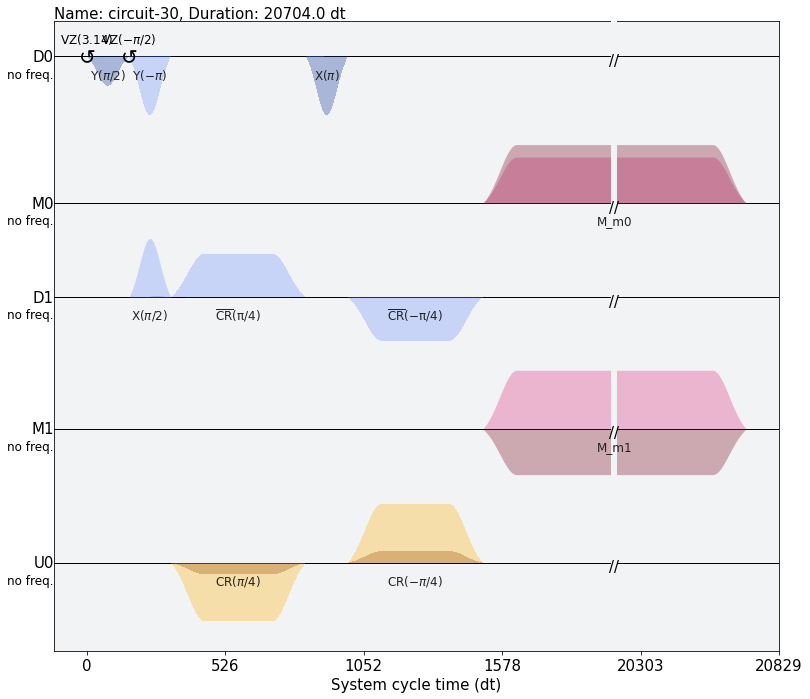

In [34]:
from qiskit import QuantumCircuit
from qiskit import transpile, schedule as build_schedule
from qiskit.test.mock import FakeAlmaden

circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.measure([0, 1], [0, 1])

circ.draw('mpl')


backend = FakeAlmaden()

transpiled_circ = transpile(circ, backend)  # Undefined Hadamard is replaced by U1
schedule = build_schedule(transpiled_circ, backend)
schedule.draw()

In [236]:
from qiskit import pulse

# create dummy pusle program
# <INSERT CODE>

with pulse.build(name='my_example') as my_program:
    # Add instructions here
    pass

my_program

ScheduleBlock(, name="my_example", transform=AlignLeft())

You can see that there are no instructions yet. The next section of this page will explain each of the instructions you might add to a schedule, and the last section will describe various alignment contexts, which determine how instructions are placed in time relative to one another.

#### Schedule Instructions

- `delay(duration, channel)`
- `play(pulse, channel)`
- `set_frequency(frequency, channel)`
- `shift_phase(phase, channel)`
- `acquire(duration, channel, mem_slot, reg_slot)`

Each instruction type has its own set of operands. As you can see above, they each include at least one Channel to specify where the instruction will be applied.

**Channels** are labels for signal lines from the control hardware to the quantum chip.

- `DriveChannels` are typically used for driving single qubit rotations,
- `ControlChannels` are typically used for multi-qubit gates or additional drive lines for tunable qubits,
- `MeasureChannels` are specific to transmitting pulses which stimulate readout, and
- `AcquireChannels` are used to trigger digitizers which collect readout signals.

`DriveChannels`, `ControlChannels`, and `MeasureChannels` are all `PulseChannels`; this means that they support transmitting pulses, whereas the AcquireChannel is a receive channel only and cannot play waveforms.

For the following examples, we will create one `DriveChannel` instance for each `Instruction` that accepts a `PulseChannel`. Channels take one integer `index` argument. Except for `ControlChannels`, the index maps trivially to the qubit label.

In [237]:
from qiskit.pulse import DriveChannel

channel = DriveChannel(0)

The pulse Schedule is independent of the backend it runs on. However, we can build our program in a context that is aware of the target backend by supplying it to pulse.build. When possible you should supply a backend. By using the channel accessors pulse.<type>_channel(<idx>) we can make sure we are only using available device resources.

In [238]:
from qiskit.test.mock import FakeValencia

# build backend aware pulse schedule
# <INSERT CODE>

backend = FakeValencia()

with pulse.build(backend=backend, name='backend_aware') as backend_aware_program:
    channel = pulse.drive_channel(0)
    print(pulse.num_qubits())

5


#### Delay instruction

One of the simplest instructions we can build is delay. This is a blocking instruction that tells the control electronics to output no signal on the given channel for the duration specified. It is useful for controlling the timing of other instructions.

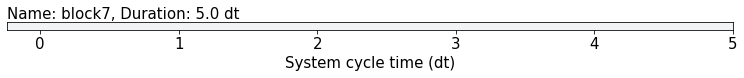

In [240]:
# delay instruction
# <INSERT CODE>

with pulse.build(backend) as delay_5dt:
    pulse.delay(5, channel)
delay_5dt.draw()

#### Play instruction

The play instruction is responsible for executing pulses. It's straightforward to add a play instruction:

```
with pulse.build() as sched:
    pulse.play(pulse, channel)
```

Let's clarify what the `pulse` argument is and explore a few different ways to build one.

A Pulse specifies an arbitrary pulse envelope. The modulation frequency and phase of the output waveform are controlled by the `set_frequency` and `shift_phase` instructions.

#### Parametric pulses

Let's build our `Gaussian` pulse using the Gaussian parametric pulse. 

A parametric pulse sends the name of the function and its parameters to the backend, rather than every individual sample. Using parametric pulses makes the jobs you send to the backend much smaller. IBM Quantum backends limit the maximum job size that they accept, so parametric pulses may allow you to run larger programs.

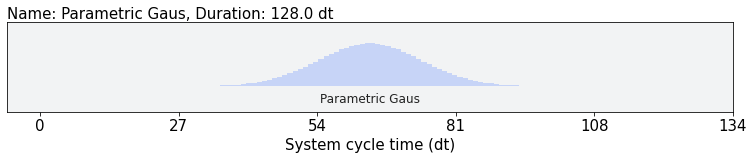

In [241]:
from qiskit.pulse import library

# build parametric pulse
# <INSERT CODE>

amp = 1
sigma = 10
num_samples = 128

gaus = pulse.library.Gaussian(num_samples, amp, sigma,
                              name="Parametric Gaus")
gaus.draw()

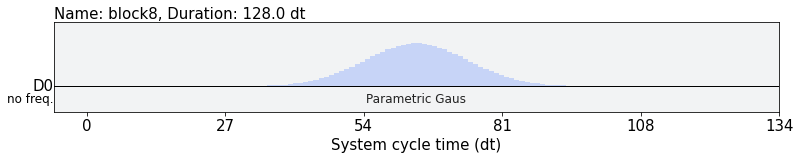

In [242]:
# play parametric pulse
# <INSERT CODE>

with pulse.build() as schedule:
    pulse.play(gaus, channel)
schedule.draw()

The frequency of a channel can be updated at any time within a Schedule by the `set_frequency` instruction. It takes a float frequency and a PulseChannel channel as input. All pulses on a channel following a set_frequency instruction will be modulated by the given frequency until another set_frequency instruction is encountered or until the program ends.

In [244]:
# set frequency
# <INSERT CODE>

with pulse.build(backend) as schedule:
    pulse.set_frequency(4.5e9, channel)

The `shift_phase` instruction will increase the phase of the frequency modulation by phase. Like set_frequency, this phase shift will affect all following instructions on the same channel until the program ends. To undo the affect of a shift_phase, the negative phase can be passed to a new instruction.

In [258]:
# shift phase
# <INSERT CODE>

with pulse.build(backend) as schedule:
    pulse.shift_phase(np.pi, channel)

The acquire instruction triggers data acquisition for readout. It takes a duration, an `AcquireChannel` which maps to the qubit being measured, and a `MemorySlot` or a `RegisterSlot`. The `MemorySlot` is classical memory where the readout result will be stored. The `RegisterSlot` maps to a register in the control electronics which stores the readout result for fast feedback.

In [259]:
from qiskit.pulse import Acquire, AcquireChannel, MemorySlot

# aqure instruction
# <INSERT CODE>

with pulse.build(backend) as schedule:
    pulse.acquire(1200, pulse.acquire_channel(0), MemorySlot(0))

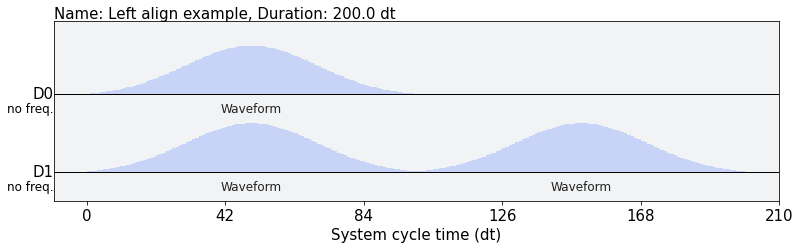

In [250]:
# example with left align schedule
# <INSERT CODE>

with pulse.build(backend, name='Left align example') as program:
    with pulse.align_left():
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

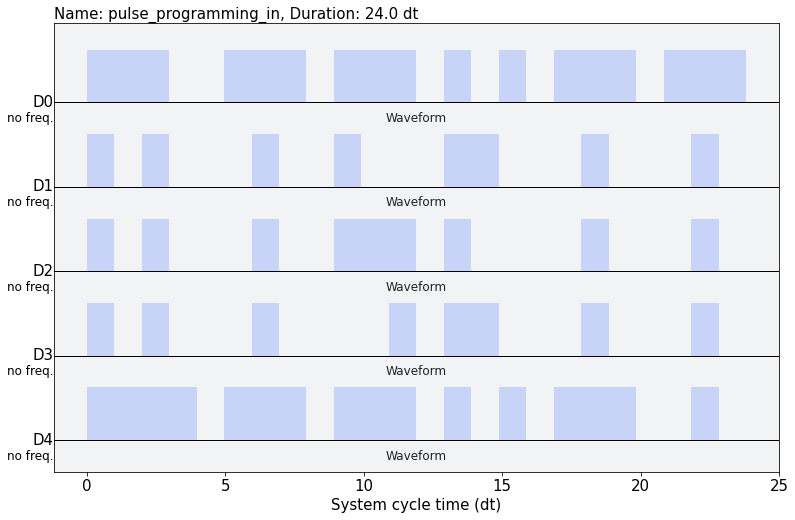

In [200]:
from qiskit import pulse

dc = pulse.DriveChannel
d0, d1, d2, d3, d4 = dc(0), dc(1), dc(2), dc(3), dc(4)

with pulse.build(name='pulse_programming_in') as pulse_prog:
    pulse.play([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], d0)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d1)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], d2)
    pulse.play([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], d3)
    pulse.play([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0], d4)

pulse_prog.draw()

### Opflow

The most important base operators are the Pauli operators. The Pauli operators are represented like this.



In [206]:
from qiskit.opflow import I, X, Y, Z
print(I, X, Y, Z)

I X Y Z


In [213]:
# These operators may also carry a coefficient.
# <INSERT CODE>

print(1.5 * I)
print(2.5 * X)

1.5 * I
2.5 * X


In [212]:
# These coefficients allow the operators to be used as terms in a sum.
# <INSERT CODE>

print(X + 2.0 * Y)

1.0 * X
+ 2.0 * Y


In [211]:
# Tensor products are denoted with a caret, like this.
# <INSERT CODE>

print(X^Y^Z)

XYZ


In [216]:
# Composition is denoted by the @ symbol.
# <INSERT CODE>

print(X @ Y @ Z)

iI


### State functions and measurements

Quantum states are represented by subclasses of the class StateFn. There are four representations of quantum states: DictStateFn is a sparse representation in the computational basis, backed by a dict. VectorStateFn is a dense representation in the computational basis backed by a numpy array. CircuitStateFn is backed by a circuit and represents the state obtained by executing the circuit on the all-zero computational-basis state. OperatorStateFn represents mixed states via a density matrix. (As we will see later, OperatorStateFn is also used to represent observables.)

In [224]:
from qiskit.opflow import (StateFn, Zero, One, Plus, Minus, H,
                           DictStateFn, VectorStateFn, CircuitStateFn, OperatorStateFn)

In [225]:
# zero, one
# <INSERT CODE>

print(Zero, One)

DictStateFn({'0': 1}) DictStateFn({'1': 1})


In [227]:
# plus, minus
# <INSERT CODE>

print(Plus, Minus)

CircuitStateFn(
   ┌───┐
q: ┤ H ├
   └───┘
) CircuitStateFn(
   ┌───┐┌───┐
q: ┤ X ├┤ H ├
   └───┘└───┘
)


In [228]:
# evaulation
# <INSERT CODE>

print(Zero.eval('0'))
print(Zero.eval('1'))
print(One.eval('1'))
print(Plus.eval('0'))
print(Minus.eval('1'))

1.0
0.0
1.0
(0.7071067811865475+0j)
(-0.7071067811865475+8.7e-17j)


In [230]:
# adjoint
# <INSERT CODE>

One.adjoint()

DictStateFn({'1': 1}, coeff=1.0, is_measurement=True)

In [231]:
# other way of writing adjoint
# <INSERT CODE>

~One

DictStateFn({'1': 1}, coeff=1.0, is_measurement=True)

#### Algebraic operations

`+` - addition

`-` - subtraction, negation (scalar multiplication by -1)

`*` - scalar multiplication

`/` - scalar division

`@` - composition

`^` - tensor product or tensor power (tensor with self n times)

`**` - composition power (compose with self n times)

`==` - equality

`~` - adjoint, alternating between a State Function and Measurement

In [233]:
import math

v_zero_one = (Zero + One) / math.sqrt(2)
print(v_zero_one)

DictStateFn({'0': 1.0, '1': 1.0}) * 0.7071067811865475


Constructing State functions

str (equal to some basis bitstring) -> DictStateFn

dict -> DictStateFn

Qiskit Result object -> DictStateFn

list -> VectorStateFn

np.ndarray -> VectorStateFn

Statevector -> VectorStateFn

QuantumCircuit -> CircuitStateFn

Instruction -> CircuitStateFn

OperatorBase -> OperatorStateFn

In [234]:
print(StateFn({'0':1}))
print(StateFn({'0':1}) == Zero)

print(StateFn([0,1,1,0]))

from qiskit.circuit.library import RealAmplitudes
print(StateFn(RealAmplitudes(2)))

DictStateFn({'0': 1})
True
VectorStateFn(Statevector([0.+0.j, 1.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2)))
CircuitStateFn(
     ┌──────────────────────────────────────────────────────────┐
q_0: ┤0                                                         ├
     │  RealAmplitudes(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7]) │
q_1: ┤1                                                         ├
     └──────────────────────────────────────────────────────────┘
)


In [221]:
from qiskit.opflow import Zero, One, H, CX, I

# bell state
# <INSERT CODE>

bell_op = CX @ (I ^ H) @ Zero
print(bell_op.to_circuit_op())

CircuitStateFn(
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
)


In [235]:
# implement arbitrary circuits
# <INSERT CODE>

print(((~One^2) @ (CX.eval('01'))).eval())
print(((H^5) @ ((CX^2)^I) @ (I^(CX^2)))**2)
print((((H^5) @ ((CX^2)^I) @ (I^(CX^2)))**2) @ (Minus^5))
print(((H^I^I)@(X^I^I)@Zero))

(1+0j)
          ┌───┐          ┌───┐     
q_0: ──■──┤ H ├───────■──┤ H ├─────
     ┌─┴─┐└───┘┌───┐┌─┴─┐└───┘┌───┐
q_1: ┤ X ├──■──┤ H ├┤ X ├──■──┤ H ├
     └───┘┌─┴─┐├───┤└───┘┌─┴─┐├───┤
q_2: ──■──┤ X ├┤ H ├──■──┤ X ├┤ H ├
     ┌─┴─┐└───┘├───┤┌─┴─┐└───┘├───┤
q_3: ┤ X ├──■──┤ H ├┤ X ├──■──┤ H ├
     └───┘┌─┴─┐├───┤└───┘┌─┴─┐├───┤
q_4: ─────┤ X ├┤ H ├─────┤ X ├┤ H ├
          └───┘└───┘     └───┘└───┘
CircuitStateFn(
     ┌───┐┌───┐     ┌───┐          ┌───┐     
q_0: ┤ X ├┤ H ├──■──┤ H ├───────■──┤ H ├─────
     ├───┤├───┤┌─┴─┐└───┘┌───┐┌─┴─┐└───┘┌───┐
q_1: ┤ X ├┤ H ├┤ X ├──■──┤ H ├┤ X ├──■──┤ H ├
     ├───┤├───┤└───┘┌─┴─┐├───┤└───┘┌─┴─┐├───┤
q_2: ┤ X ├┤ H ├──■──┤ X ├┤ H ├──■──┤ X ├┤ H ├
     ├───┤├───┤┌─┴─┐└───┘├───┤┌─┴─┐└───┘├───┤
q_3: ┤ X ├┤ H ├┤ X ├──■──┤ H ├┤ X ├──■──┤ H ├
     ├───┤├───┤└───┘┌─┴─┐├───┤└───┘┌─┴─┐├───┤
q_4: ┤ X ├┤ H ├─────┤ X ├┤ H ├─────┤ X ├┤ H ├
     └───┘└───┘     └───┘└───┘     └───┘└───┘
)
CircuitStateFn(
     ┌─────────────┐     
q_0: ┤0            ├─────
     